# Trabajo Semanal N°4

### Autor: Gonzalo Goumaz

## Requisitos de diseño
Se pide diseñar un filtro que cumpla con la siguiente plantilla
<img src="Plantilla.png">

## Obtención y análisis de Función de Transferencia
En el pdf adjunto se desarrollan los puntos 1) y 2) del trabajo. En ellos se obtiene la función de transferencia normalizada del filtro pasa altos a partir de una transformación realizada sobre un pasa bajos prototipo. Luego se realiza el diagrama de polos y ceros y un análisis frecuencial.

In [1]:
from IPython.display import IFrame
IFrame("./TS4_A.pdf", width = 900, height = 900)

## Simulación numérica
Para verificar lo desarrollado hasta este punto, se recurre a herramientas de simulación numérica.

Epsilon: 0.5088471399095875
Orden del filtro: 3
Transferencia pasa altos normalizada: TransferFunctionContinuous(
array([1., 0., 0., 0.]),
array([1., 2., 2., 1.]),
dt: None
)


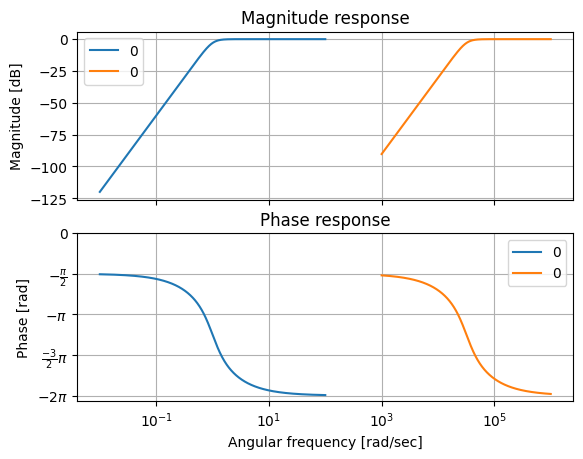

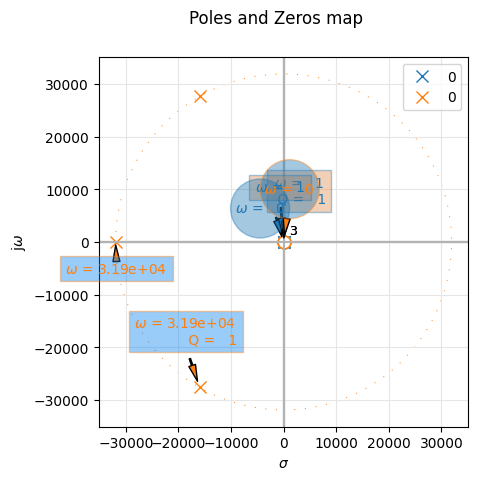

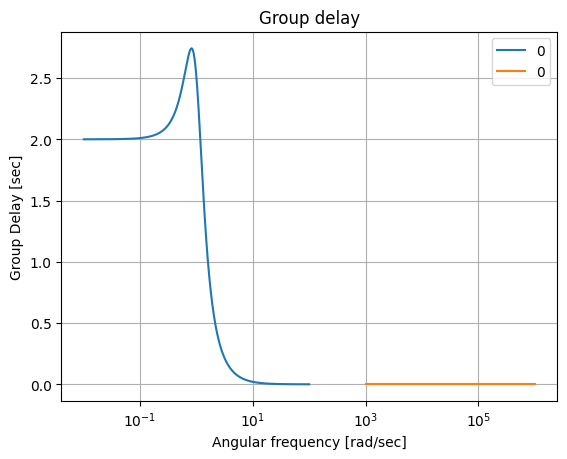

In [2]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import pytc2.sistemas_lineales as tc2
import math as m

#Requisitos de plantilla
fp = 40e3       # [Hz]
fs = 10e3       # [Hz]
alpha_max = 1   # [dB]
alpha_min = 30  # [dB]

# Normalización de frecuencia
wp = 1
ws = fs/fp

# Plantilla del pasabajos prototipo
Wp_lp = 1
Ws_lp = 1/ws

# Determino epsilon
ee = 10**(alpha_max/10)-1
e = m.sqrt(ee)

# Determino el órden del filtro
n = m.log((10**(alpha_min/10)-1)/ee,Ws_lp)/2
# Redondeo hacia el primer entero mayor
n = m.ceil(n)

print("Epsilon:", e)
print("Orden del filtro:", n)

# Trato al filtro como si fuese un Butterworth mediante una renormalización.
# Obtengo una transferencia Butter de tercer órden
z_lp, p_lp, k_lp = sig.buttap(n)
tf_lp = sig.zpk2tf(z_lp, p_lp, k_lp)

# Hago la transformación lp-hp
num, den = sig.lp2hp(tf_lp[0], tf_lp[1])
tf_hp = sig.TransferFunction(num, den)

print("Transferencia pasa altos normalizada:",tf_hp)

tc2.analyze_sys(tf_hp)

# Norma de frecuencia (No multiplico por 2pi para que el eje w pase a ser de f)
Omega_w = e**(1/n)*fp

num, den = sig.lp2hp(tf_lp[0], tf_lp[1], Omega_w) 
tf_hp = sig.TransferFunction(num, den)

tc2.analyze_sys(tf_hp)

## Implementación del filtro mediante estructuras pasivas
A continuación puede verse el desarrollo en el cual se llega a la red normalizada que responde al filtro pasa altos solicitado.

In [3]:
from IPython.display import IFrame
IFrame("./TS4_B.pdf", width = 900, height = 900)

Para corroborar que la red obtenida se comporta según lo impuesto por la plantilla se recurre a una simulación circuital mediante LTspice.
<img src="Red_Pasa_Altos_Pasivo.png">
<img src="Sim_Pasa_Altos_Pasivo.png">

## Activación del filtro mediante el GIC de Antoniou
En este punto se procede a reemplazar los inductores utilizando el Convertidor Generalizado de Inmitancias.

In [4]:
from IPython.display import IFrame
IFrame("./TS4_C.pdf", width = 900, height = 900)

Nuevamente, se procede a verificar la red propuesta en LTspice.
<img src="GIC.png">
<img src="Red_Pasa_Altos_GIC.png">
<img src="Sim_Pasa_Altos_GIC.png">

Se observa que al desnormalizar el circuito, no se estaría cumpliendo con el parámetro $\alpha_{max}$ impuesto por la plantilla. Sin embargo, al realizar una simulación para la red normalizada sí se cumple con la plantilla.
<img src="Sim-Normalizada_Pasa_Altos_GIC.png">

Esto podría atribuirse al hecho de involucrar dos amplificadores operacionales más en la red y al GBP del modelo utilizado.